In [238]:
import numpy as np
import pandas as pd
from random import  uniform
import statistics
import matplotlib.pyplot as plt

# Classe do neurônio de Rosenblatt

In [239]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.5, .5),
            uniform(-.5, .5),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
    
    def muda_pesos_iniciais(self,x1,x2,x3):
        self.pesos[0] = self.pesos[0]*x1
        self.pesos[1] = self.pesos[1]*x2
        self.pesos[2] = self.pesos[2]*x3

    def carrega_dados(self):
        dataset = np.fromfile('data1.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def somatorio(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos

        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        for i in range(100):
            if(self.somatorio() == False):
                self.epocas += 1
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        print("Média de ajustes feitos nos pesos: ",sum(self.total_de_ajustes)/len(self.total_de_ajustes))
        print("Desvio padrão de ajustes feitos nos pesos: ",statistics.stdev(self.total_de_ajustes))
        
n1 = Neuronio()
n2 = Neuronio()
n3 = Neuronio()
n4 = Neuronio()
n5 = Neuronio()
n6 = Neuronio()
n7 = Neuronio()
n8 = Neuronio()
n9 = Neuronio()

# 9 Configurações diferentes 
{0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}

In [240]:
n1.muda_pesos_iniciais(0.4 ,0.1 ,0.01)
n2.muda_pesos_iniciais(0.4 ,0.01, 0.1)
n3.muda_pesos_iniciais(0.4 ,0.4 , 0.4)
n4.muda_pesos_iniciais(0.1 ,0.4 ,0.01)
n5.muda_pesos_iniciais(0.1 ,0.01, 0.4)
n6.muda_pesos_iniciais(0.1 ,0.1 , 0.1)
n7.muda_pesos_iniciais(0.01,0.4 , 0.1)
n8.muda_pesos_iniciais(0.01,0.1 , 0.4)
n9.muda_pesos_iniciais(0.01,0.01,0.01)

# Treino de cada configuração

In [241]:
n1.treino()

Total de épocas:  39
Total de ajustes feitos nos pesos:  12358
Média de ajustes feitos nos pesos:  316.87179487179486
Desvio padrão de ajustes feitos nos pesos:  151.18534798945848


In [242]:
n2.treino()

Total de épocas:  20
Total de ajustes feitos nos pesos:  6321
Média de ajustes feitos nos pesos:  316.05
Desvio padrão de ajustes feitos nos pesos:  168.73039067353014


In [243]:
n3.treino()

Total de épocas:  83
Total de ajustes feitos nos pesos:  27475
Média de ajustes feitos nos pesos:  331.0240963855422
Desvio padrão de ajustes feitos nos pesos:  140.53633988017984


In [244]:
n4.treino()

Total de épocas:  41
Total de ajustes feitos nos pesos:  13182
Média de ajustes feitos nos pesos:  321.5121951219512
Desvio padrão de ajustes feitos nos pesos:  149.88964639881226


In [245]:
n5.treino()

Total de épocas:  34
Total de ajustes feitos nos pesos:  10708
Média de ajustes feitos nos pesos:  314.94117647058823
Desvio padrão de ajustes feitos nos pesos:  161.0825011989613


In [246]:
n6.treino()

Total de épocas:  34
Total de ajustes feitos nos pesos:  10866
Média de ajustes feitos nos pesos:  319.5882352941176
Desvio padrão de ajustes feitos nos pesos:  153.77632667376437


In [247]:
n7.treino()

Total de épocas:  23
Total de ajustes feitos nos pesos:  7135
Média de ajustes feitos nos pesos:  310.2173913043478
Desvio padrão de ajustes feitos nos pesos:  165.08784342716103


In [248]:
n8.treino()

Total de épocas:  32
Total de ajustes feitos nos pesos:  10192
Média de ajustes feitos nos pesos:  318.5
Desvio padrão de ajustes feitos nos pesos:  148.03290828556965


In [249]:
n9.treino()

Total de épocas:  43
Total de ajustes feitos nos pesos:  13783
Média de ajustes feitos nos pesos:  320.5348837209302
Desvio padrão de ajustes feitos nos pesos:  148.95738426000034


# Gráfico de cada configuração

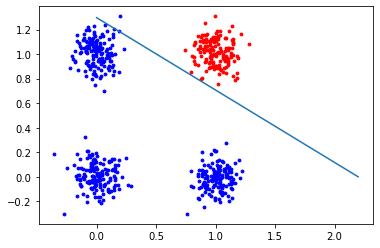

In [250]:
n1.mostra_grafico()

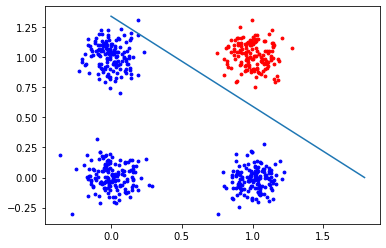

In [251]:
n2.mostra_grafico()

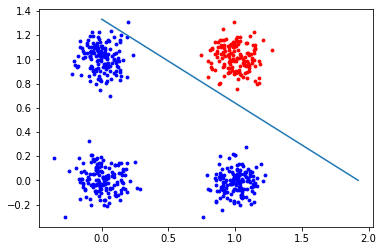

In [252]:
n3.mostra_grafico()

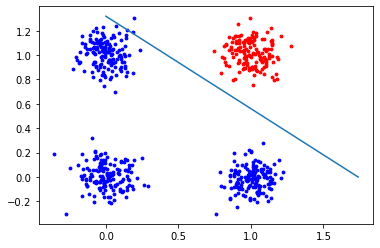

In [253]:
n4.mostra_grafico()

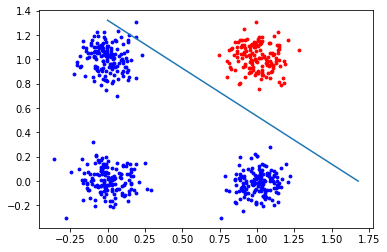

In [254]:
n5.mostra_grafico()

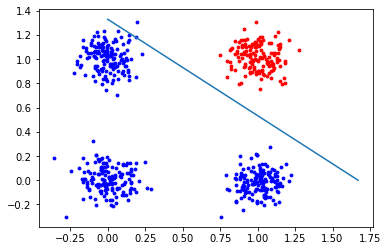

In [255]:
n6.mostra_grafico()

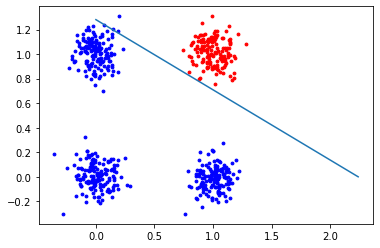

In [256]:
n7.mostra_grafico()

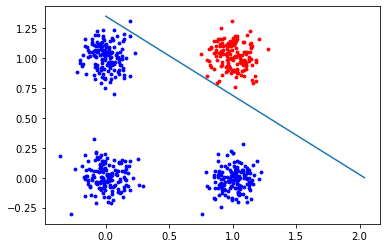

In [257]:
n8.mostra_grafico()

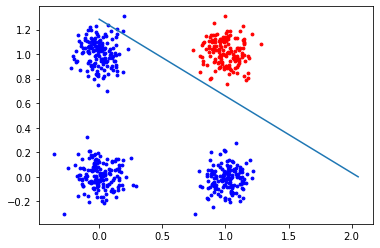

In [258]:
n9.mostra_grafico()